<a href="https://colab.research.google.com/github/sebavassou/Estatistica_Inferencial/blob/main/aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatística t: 0.943
p-valor: 0.349
Conclusão: Não rejeitar H0


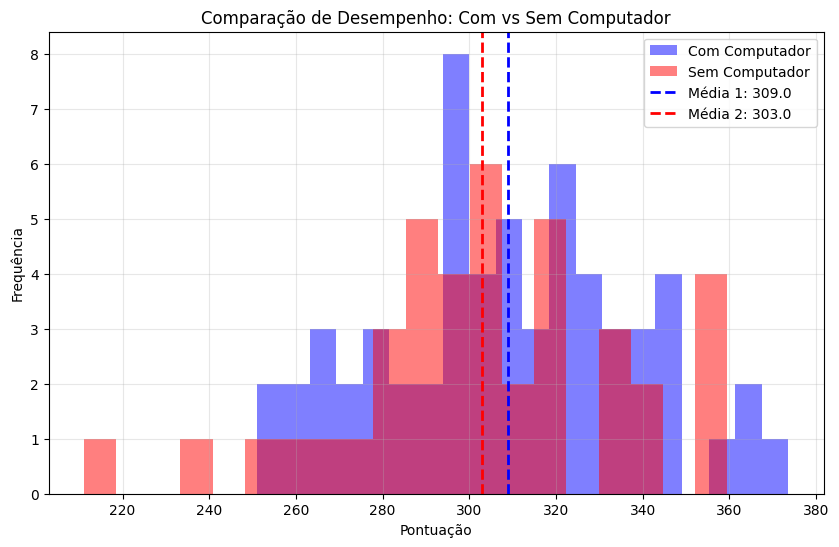

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Dados do problema
n1, x1_bar, s1 = 60, 309, 29
n2, x2_bar, s2 = 40, 303, 32

# Criar amostras artificiais com essas características
np.random.seed(42)
amostra1 = np.random.normal(x1_bar, s1, n1)
amostra2 = np.random.normal(x2_bar, s2, n2)

# Ajustar para ter exatamente as médias e desvios desejados
amostra1 = (amostra1 - amostra1.mean()) * (s1/amostra1.std()) + x1_bar
amostra2 = (amostra2 - amostra2.mean()) * (s2/amostra2.std()) + x2_bar

# Teste t para amostras independentes
t_stat, p_valor = stats.ttest_ind(amostra1, amostra2, equal_var=False)

print(f"Estatística t: {t_stat:.3f}")
print(f"p-valor: {p_valor:.3f}")
print(f"Conclusão: {'Rejeitar H0' if p_valor < 0.05 else 'Não rejeitar H0'}")
# Visualização das distribuições
plt.figure(figsize=(10, 6))
plt.hist(amostra1, bins=20, alpha=0.5, label='Com Computador', color='blue')
plt.hist(amostra2, bins=20, alpha=0.5, label='Sem Computador', color='red')
plt.axvline(amostra1.mean(), color='blue', linestyle='--', linewidth=2, label=f'Média 1: {amostra1.mean():.1f}')
plt.axvline(amostra2.mean(), color='red', linestyle='--', linewidth=2, label=f'Média 2: {amostra2.mean():.1f}')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Comparação de Desempenho: Com vs Sem Computador')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Estatística t: 9.143
p-valor: 0.0000
Média das diferenças: 1.206 km/l
Desvio padrão das diferenças: 0.373 km/l


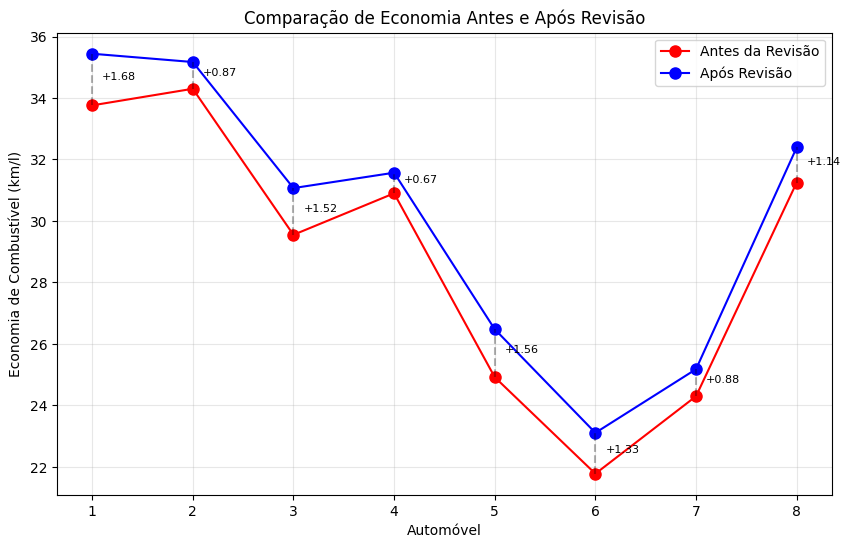

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Dados do problema
depois = np.array([35.44, 35.17, 31.07, 31.57, 26.48, 23.11, 25.18, 32.39])
antes = np.array([33.76, 34.30, 29.55, 30.90, 24.92, 21.78, 24.30, 31.25])
diferencas = depois - antes

# Teste t pareado
t_stat, p_valor = stats.ttest_rel(depois, antes, alternative='greater')
print(f"Estatística t: {t_stat:.3f}")
print(f"p-valor: {p_valor:.4f}")
print(f"Média das diferenças: {diferencas.mean():.3f} km/l")
print(f"Desvio padrão das diferenças: {diferencas.std(ddof=1):.3f} km/l")

# Visualização antes/depois
plt.figure(figsize=(10, 6))
automoveis = np.arange(1, 9)
plt.plot(automoveis, antes, 'ro-', label='Antes da Revisão', markersize=8)
plt.plot(automoveis, depois, 'bo-', label='Após Revisão', markersize=8)
for i in range(8):
    plt.plot([i+1, i+1], [antes[i], depois[i]], 'k--', alpha=0.3)
    plt.text(i+1.1, (antes[i]+depois[i])/2, f'+{diferencas[i]:.2f}', fontsize=8)
plt.xlabel('Automóvel')
plt.ylabel('Economia de Combustível (km/l)')
plt.title('Comparação de Economia Antes e Após Revisão')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from google.colab import files

# Fazer upload do arquivo no Colab
print("Selecione o arquivo programa_capacitacao.csv")
uploaded = files.upload()

# Ler o arquivo
df = pd.read_csv('aula05-programa_capacitacao.csv')

# Verificar se foi carregado corretamente
print(f"Dataset carregado com {len(df)} registros")
print("\nPrimeiras linhas:")
print(df.head())
print("\nInformações do dataset:")
print(df.info())

# 1. Teste t para amostras independentes
grupo_programa = df[df['grupo'] == 'programa']['salario_mensal']
grupo_controle = df[df['grupo'] == 'controle']['salario_mensal']
t_stat, p_valor = stats.ttest_ind(grupo_programa, grupo_controle, equal_var=False)
print(f"Teste t para diferença de médias:")
print(f"Estatística t: {t_stat:.3f}")
print(f"p-valor: {p_valor:.4f}")

Selecione o arquivo programa_capacitacao.csv


Saving aula05-programa_capacitacao.csv to aula05-programa_capacitacao (2).csv
Dataset carregado com 270 registros

Primeiras linhas:
   id  salario_mensal     grupo  experiencia_anos  idade  escolaridade  \
0   1         2631.50  programa               2.6     23             1   
1   2         4297.88  programa               2.3     20             2   
2   3         3726.38  programa               7.8     28             3   
3   4         2294.96  programa               3.8     41             4   
4   5         3037.12  programa               2.4     29             3   

    escolaridade_texto  
0                Médio  
1  Superior Incompleto  
2             Superior  
3        Pós-graduação  
4             Superior  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  270 non-null    int6